<a href="https://colab.research.google.com/github/Sopralapanca/TwitterDataset-DM-Project/blob/develop/DM_preparation_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What will be done here...
Following the last notebook we have correctly assigned the columns in a typo that permits to work with the attributes, in this way here we can start to handle correctly the 

Task 1.2: Data Preparation

Improve the quality of your data and prepare it by extracting new features interesting for
describing the user and his/her behavior derived from the information collected from the
tweets.
Examples of indicators to be computed are:
1. How many tweets were published by the user?
2. How many tweets are published by the user in a given period of time?
3. Total number of tweets
4. Total number of likes and comments
5. Ratio between the number of tweets and the number of likes
6. Entropy of the user
7. Average length of the tweets per user
8. Average number of special characters in the tweets per user



# Importing the libraries and loading the dataset

In [ ]:
# Import libraries
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import math
import calendar
import os
from os import path
from sys import getsizeof

In [ ]:
# download data from google drive

if not path.exists('users.csv'):
  users_fileid = "16b7Gbe69-SaVzGc1x3s3s7b8lzHgd5BR"
  tweets_fileid = "1qYoicySRBbLi9Y8ZytMEi9ee2dIhxxUe"

  !gdown $users_fileid
  !gdown $tweets_fileid

Downloading...
From: https://drive.google.com/uc?id=16b7Gbe69-SaVzGc1x3s3s7b8lzHgd5BR
To: /content/users.csv
100% 641k/641k [00:00<00:00, 84.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qYoicySRBbLi9Y8ZytMEi9ee2dIhxxUe
To: /content/tweets.csv
100% 1.86G/1.86G [00:16<00:00, 113MB/s]


In [ ]:
tweet_path = "tweets.csv"
user_path = "users.csv"

# max_rows is used to load a portion of the dataset

max_rows = 0
 
users_df = pd.read_csv(user_path) 

if max_rows != 0:
  tweets_df = pd.read_csv(tweet_path, nrows=max_rows)
else:
  tweets_df = pd.read_csv(tweet_path)

# **Data Preparation**
---
In this section we deal with missing values and anomalies in the dataset so that we can later extract indicators

In [ ]:
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

#### Assigning correct type to attribute

In [ ]:
# convert tweets_df columns from object to numeric. 
# If a value can't be converted to integer a NaN is inserted

columns = ["id", "user_id", "retweet_count", "reply_count",
           "favorite_count", "num_hashtags",  "num_urls", "num_mentions"]

for col in columns:
    tweets_df[col]=pd.to_numeric(tweets_df[col], errors='coerce', downcast='integer')

tweets_df["created_at"]=pd.to_datetime(tweets_df["created_at"], errors='coerce', yearfirst=True)

# assign datetime in user_df

users_df["created_at"]=pd.to_datetime(users_df["created_at"], errors='coerce', yearfirst=True)

In [ ]:
tweets_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# convert name of users_df to string
users_df['name'] = users_df['name'].astype('string')

# convert text of tweets_df to string
tweets_df['text'] = tweets_df['text'].astype('string')

In [ ]:
long__mask_2o17 = (tweets_df['text'].str.len() > 140 ) & (tweets_df['created_at'] < pd.to_datetime('2017-11-08'))
long__mask_others = (tweets_df['text'].str.len() > 280) & (tweets_df['created_at'] > pd.to_datetime('2017-11-08'))

print("Long tweets before the update: ", len(tweets_df[long__mask_2o17]))
print("Long tweets after the update:  ", len(tweets_df[long__mask_others]))

Long tweets before the update:  14535
Long tweets after the update:   243


There are several tweets that are exceeding the ceiling of maximum characters permitted.

In [ ]:
longer_than_possible_df = pd.concat([tweets_df[long__mask_2o17], tweets_df[long__mask_others]])
print("All the tweets that exceed the possible length of tweets", len(longer_than_possible_df))
longer_grouped = longer_than_possible_df.groupby('user_id')
#idx is the user_id with most tweets encoded wrongly
idx, max = longer_grouped.size().agg(['idxmax','max'])
print("There is a user with more than usual number of long tweets, it is the user with ID:", int(idx))

del long__mask_2o17, long__mask_others, longer_than_possible_df

All the tweets that exceed the possible length of tweets 14778
There is a user with more than usual number of long tweets, it is the user with ID: 252139342


In [ ]:
print_full(tweets_df.loc[tweets_df.user_id == int(idx)]['text'].iloc[:10])

340                                                                                                                                      à¹à¸à¸·à¹à¸­à¹à¸«à¸­à¸°.. à¸à¸µà¹à¸¡à¸´à¹à¸(à¹à¸¡à¹à¸à¸µà¹à¸à¹)à¸à¹à¸²à¸à¸¥à¸±à¸§à¸à¸µà¹à¸ªà¸¸à¸ OTL (à¸à¸²à¸£à¸§à¸°à¸à¸µà¹à¸ªà¸²à¸§)
8916                                                                                                                                                                       à¸à¸´à¸à¸à¸µà¹à¸à¸­à¸à¸à¸§à¸à¹à¸£à¸²à¹à¸ªà¸µà¸¢à¸à¸±à¸§à¹à¸¥à¹à¸§à¸à¸£à¸±à¸.. (à¸à¸²à¸à¹à¸«à¸à¸·à¹à¸­)
9366                                                                                        @lenes_frano (à¸à¸¡à¸«à¸²à¸¢à¹à¸à¸ªà¸±à¸à¸à¸±à¸à¸à¹à¸­à¸à¸à¸¸à¹à¸à¸à¸¶à¹à¸à¸¡à¸²à¸à¸§à¹à¸²à¸à¸­à¹à¸¥à¸à¸à¹à¹à¸¥à¹à¸§à¸à¸¶à¸à¸¥à¸à¹à¸à¸à¸¡à¸­à¸¢à¸¹à¹à¸à¹à¸§à¸¢à¸à¸±à¸)
14399                                                                                                                 

As we can see the majority of tweets seems to doesn't have any meaning, but it could be a problem of encoding. So we try to encode in *ISO-8859-1* and back in *UTF-8* to be able to read them.

In [ ]:
for text in tweets_df.loc[tweets_df.user_id == int(idx)]['text'].iloc[:10]:
  if not pd.isnull(text):
    converted_str = text.encode('ISO-8859-1').decode('utf-8')
    print(converted_str + " and it is long: " + str(len(converted_str)))

เชื่อเหอะ.. พี่มิ้น(แม่ชีเน่)น่ากลัวที่สุด OTL (คารวะพี่สาว) and it is long: 60
ซินนี่ของพวกเราเสียตัวแล้วครับ.. (ปาดเหงื่อ) and it is long: 44
@lenes_frano (จมหายไปสักพักก่อนพุ่งขึ้นมาคว้าคอเลนซ์แล้วดึงลงไปจมอยู่ด้วยกัน) and it is long: 77
@Grosmont โครตร้อนต่างหากละครับ -w- (แผ่ด้วย) and it is long: 45
@lenes_atsusa เพ้อเจ้อใหญ๋แล้วเลนซ์ ไปนอนกันดีกว่านะ เดี๋ยวผมพาไปส่ง = =" and it is long: 73
@lenes_atsusa (กอด) หยุดไม่ได้ฮะ T___T and it is long: 38
@jingkabellz @SaitoShane @EH_Leroi ช่าย.. โกหกไม่ดีนะฮะ (หัวเราะ) เพราะอย่างพอชเลนน่าจะเป็นปั๊กมากกว่ารอดไวเลอร์.. ใช่ไหมนะ? O_O and it is long: 128
@Eh_Tomson งื้อ (ลงนั่งด้วย เขยิบเข้าใกล้เนียนๆ) ขอโทษฮะ TT_TT and it is long: 62
@miosux เอเดรียน - คิดถึงผมทำไมครับ? เราไม่ได้เป็นอะไรกัน (หัวเราะ) and it is long: 67


As we have stated the tweets doesn't exceed the ceiling of lenght, but they were encoded in the wrong type. But as we have seen there are not only tweets from this user that are wrongly encoded, but are also from other users around the world. That's why we decided to convert all the tweets in the proper format so then we can see how many tweets are effectively exceeding the limit.

In [ ]:
tweets_df['text'] = tweets_df['text'].apply(lambda x: x.encode('ISO-8859-1', errors='replace').decode('utf-8', errors='replace') if not pd.isnull(x) else x)

Converting back to the proper format

In [ ]:
tweets_df['text'] = tweets_df['text'].astype('string')

In [ ]:
final_mask1 = (tweets_df['text'].str.len() > 140 ) & (tweets_df['created_at'] < pd.to_datetime('2017-11-08'))
final_mask2 = (tweets_df['text'].str.len() > 280) & (tweets_df['created_at'] > pd.to_datetime('2017-11-08'))

print("Long tweets before the update: ", len(tweets_df[final_mask1]))
print("Long tweets after the update:  ", len(tweets_df[final_mask2]))

del final_mask1, final_mask2

Long tweets before the update:  1585
Long tweets after the update:   0


We will not touch the remaining tweets because they can have a wrong 'created_at' value

### **Removing user_id in tweets dataframe that are not present in users dataframe**

In order to do this we merge the dataframes to assign to each user his tweets, then we drop users df columns

In [ ]:
# remove rows on tweets dataframe that have user_id none
tweets_df.dropna(subset=['user_id'], inplace=True)

# in order to merge we convert user_id in int
tweets_df['user_id'] = tweets_df['user_id'].astype('int')

tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13230801 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              float64       
 1   user_id         int64         
 2   retweet_count   float64       
 3   reply_count     float64       
 4   favorite_count  float64       
 5   num_hashtags    float64       
 6   num_urls        float64       
 7   num_mentions    float64       
 8   created_at      datetime64[ns]
 9   text            string        
dtypes: datetime64[ns](1), float64(7), int64(1), string(1)
memory usage: 1.1 GB


In [ ]:
# merge the two dataframe, checking length of df after and before merging

users_df.rename(columns = {'id':'user_id'}, inplace = True)
users_df.rename(columns = {'created_at':'subscription_date'}, inplace = True)


print("Number of tweets before the merge:", len(tweets_df))
tweets_df = tweets_df.merge(users_df,on='user_id', how='inner')
print("Number of tweets after the merge:", len(tweets_df))

tweets_df.drop(columns=['name', 'lang', 'bot', 'subscription_date', 'statuses_count'], axis=1, inplace=True)

Number of tweets before the merge: 13230801
Number of tweets after the merge: 13229862


### **Removing duplicates and empty text**

In [ ]:
def find_and_remove_duplicates(df: DataFrame, dataframe_name):
    original_lenght = len(df)
    print(f"Len of {dataframe_name} before cleaning: {original_lenght}")

    df.drop_duplicates(inplace=True)
    new_lenght = len(df)

    count = original_lenght - new_lenght
    print(f"duplicates removed from {dataframe_name} file: \t{count}")
    print(f"Len of {dataframe_name} after cleaning: {new_lenght}")
    print(f"We have {round((count/original_lenght)*100,4)}% of duplicates in {dataframe_name} file\n")

find_and_remove_duplicates(tweets_df, "tweets_df")
find_and_remove_duplicates(users_df, "users_df")

Len of tweets_df before cleaning: 13229862
duplicates removed from tweets_df file: 	1952100
Len of tweets_df after cleaning: 11277762
We have 14.7553% of duplicates in tweets_df file

Len of users_df before cleaning: 11508
duplicates removed from users_df file: 	0
Len of users_df after cleaning: 11508
We have 0.0% of duplicates in users_df file



In [ ]:
# we decided to removes the rows that corresponds to empty text on tweets dataframe
tweets_df.dropna(subset=['text'], inplace=True)

### **Check if there are duplicated ids on tweets df and handle it**

In [ ]:
# print non unique row in the tweets dataframe
tweets_df[tweets_df['id'].duplicated() & tweets_df['id'].notnull()]["id"].astype(int)

69327       574164294280945664
258997      579432000072773632
315197              7674792957
377921      587657400674607104
503439      570813308145545216
                   ...        
13182743    459928211590086656
13190430    460878703635857408
13201526    476358378000633856
13202201    461622394138804160
13210064    460373867236556800
Name: id, Length: 506, dtype: int64

In [ ]:
# take one of the ids and show its tweets
tweets_df.loc[tweets_df["id"]==481756826439286784]

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
8668469,4.817568e+17,2233856637,0.0,0.0,0.0,0.0,0.0,1.0,2019-06-27 11:12:32,@Dabizdiverxo yo prefiere bebermelo... Supongo...
12265058,4.817568e+17,614258591,2.0,0.0,5.0,0.0,0.0,0.0,2019-06-27 11:12:32,Chi va piano va sano e va lontano. Ma probabil...


As we can see there are two tweets with the same tweet id but different user id, text and counters

In [ ]:
 # we decided to replace a duplicated id with a NaN, later on these NaN values will be filled with an unique generated id
tweets_df.loc[(tweets_df['id'].duplicated() & tweets_df['id'].notnull()), "id"] = np.nan 

Check duplicated ids on users dataframe

In [ ]:
# print non unique row in the users dataframe
users_df[users_df['user_id'].duplicated() & users_df['user_id'].notnull()]["user_id"].astype(int)

# no duplicated in users dataframe

Series([], Name: user_id, dtype: int64)

### **Handling of anomalies**

In this section we handle anomalies identified in the understanding phase

#### Cleaning of counter type fields

As we can see using the describe method and from the graphs made in the understanding notebook in the counter type fields there are very high values that clearly are anomalies

In [ ]:
# substitute negative values
columns = ["retweet_count", "reply_count", "favorite_count", "num_hashtags",  "num_urls", "num_mentions"] 

for col in columns:
  tweets_df[col].mask(tweets_df[col].lt(0),0, inplace=True)

In [ ]:
# iterate on columns and substitute outliers with NaN. 
# NaN will be substituted with mean per user.

# Since there are very high values first of all we print the data at a specific quantile
quantile_list = [0.75, 0.90, 0.95, 0.97, 0.99,0.995, 0.999, 0.9999, 0.99999, 0.999999]

for col in columns:
  print(tweets_df[col].quantile(quantile_list))
  print()

0.750000    1.000000e+00
0.900000    2.600000e+01
0.950000    4.580000e+02
0.970000    1.517000e+03
0.990000    7.485000e+03
0.995000    1.761537e+04
0.999000    1.164896e+05
0.999900    3.932630e+05
0.999990    3.350059e+06
0.999999    1.891735e+10
Name: retweet_count, dtype: float64

0.750000    0.000000e+00
0.900000    0.000000e+00
0.950000    0.000000e+00
0.970000    0.000000e+00
0.990000    0.000000e+00
0.995000    0.000000e+00
0.999000    1.000000e+00
0.999900    2.300000e+01
0.999990    7.960802e+03
0.999999    1.317907e+37
Name: reply_count, dtype: float64

0.750000    0.000000e+00
0.900000    1.000000e+00
0.950000    2.000000e+00
0.970000    3.000000e+00
0.990000    7.000000e+00
0.995000    1.200000e+01
0.999000    4.600000e+01
0.999900    3.288000e+03
0.999990    2.266100e+04
0.999999    8.257937e+09
Name: favorite_count, dtype: float64

0.750000    0.000000e+00
0.900000    1.000000e+00
0.950000    1.000000e+00
0.970000    2.000000e+00
0.990000    3.000000e+00
0.995000    4.0

In [ ]:
# then we choose a quantile and we substitute all the values greater than the 
# quantile with NaN

# based on the boxplots image on understanding notebook 
# and the printed percentile above we choose:
# retweet count   0.999900
# reply count     0.999990
# favorite count  0.999990
# num_hashtags    0.999990
# num_urls        0.999900
# num_mentions    0.999900

tmp = ["retweet_count", "num_urls", "num_mentions"]
for elem in tmp:
  tweets_df[elem].where(tweets_df[elem] <= tweets_df[elem].quantile(0.999900), np.nan, inplace=True)

tmp = ["reply_count", "favorite_count", "num_hashtags"]

for col in tmp:
  tweets_df[col].where(tweets_df[col] <= tweets_df[col].quantile(0.999990), np.nan, inplace=True)

In [ ]:
tweets_df.describe()

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
count,1.059931e+07,1.086071e+07,1.045008e+07,1.045086e+07,1.032346e+07,1.032318e+07,1.045067e+07,1.045084e+07
mean,4.755295e+17,8.303962e+08,4.934116e+02,5.846484e-02,1.292587e+00,1.887734e-01,1.643135e-01,5.268640e-01
std,1.615231e+17,8.522354e+08,6.735149e+03,1.405089e+01,7.279808e+01,3.161300e+00,3.765967e-01,8.140293e-01
min,3.460000e+02,6.780330e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.646363e+17,2.325471e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.250204e+17,4.680735e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.774528e+17,1.226238e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,9.999974e+17,3.164942e+09,3.932630e+05,7.900000e+03,2.266100e+04,2.481000e+03,3.000000e+00,1.100000e+01


#### Clean the language column in the users dataframe

For the language column we analyzed a few tweets and decided to assign them the English value. We then transformed all the strings into a lower case in order to combine languages such as "en-gb" and "en-GB". The "xx-lc" language does not exist and has been transformed into "en"

In [ ]:
users_df['lang'] = users_df['lang'].str.lower() # to lower case

users_df['lang'] = users_df['lang'].replace("select language...", "en")
users_df['lang'] = users_df['lang'].replace("xx-lc", "en")

In [ ]:
print(users_df["lang"].unique())

['en' 'it' 'fr' 'ru' 'es' 'tr' 'en-gb' 'pt' 'nl' 'id' 'zh-tw' 'ja' 'de'
 'ko' 'en-au' 'da' 'ar' 'zh-cn' 'pl' 'el' 'fil' 'sv']


#### Cleaning the wrong dates

Our assumption is since the ID of tweets in an incremental number, older tweets will have a smaller ID and the younger a bigger one. Following this assumption we will assign to each day a median ID and then substitute the incorrect date with the nearest ID day.

In [ ]:
from datetime import datetime

today = pd.to_datetime("today")     # Tweets cannot be written in the future!
min = pd.to_datetime("2006-03-21")  # Neither before the creation of Twitter :D

mask_datesOK = (tweets_df['created_at'] < today) & (tweets_df['created_at'] > min)  # We create a mask to divide in wrong and right dates

id_calendar = tweets_df[mask_datesOK][['id', 'created_at']].copy()
id_calendar['created_at'] = id_calendar['created_at'].dt.strftime('%Y-%m-%d')       # Converting the datetimes in just YY - mm - dd
by_date_df = id_calendar.groupby('created_at', as_index=False).median()             # In order to group the tweets in days and extrapolate the median ID for each day

del id_calendar # Free some RAM ...

by_date_df["created_at"]=pd.to_datetime(by_date_df["created_at"], errors='coerce', yearfirst=True)
print(by_date_df.head(5))
print("Number of tweets with wrong dates: ", len(tweets_df[~mask_datesOK]))

  created_at          id
0 2012-03-11   6460111.0
1 2012-04-13  26267046.0
2 2012-04-14  27196141.0
3 2012-04-15  28060561.0
4 2012-04-16  28729141.0
Number of tweets with wrong dates:  97239


As we can see in the frame by_date we have each day from the correct tweets and his reppresenting ID.

In [ ]:
users_subscription = users_df[users_df['user_id'].isin(tweets_df[~mask_datesOK]['user_id'])].copy()
users_subscription.drop(columns=['name', 'lang', 'bot', 'statuses_count'], inplace=True)            # Taking just the columns that we need

print("User with tweets dated uncorrectly subcribed first ", users_subscription['subscription_date'].min())
print("User with tweets dated uncorrectly subcribed last  ", users_subscription['subscription_date'].max())

tweets_grouped = tweets_df[~mask_datesOK].groupby('user_id')

print("Frame with user subscriptions            ", len(users_subscription))
print("Frame with wrong tweets grouped by users ", len(tweets_grouped))

User with tweets dated uncorrectly subcribed first  2012-01-24 01:57:38
User with tweets dated uncorrectly subcribed last   2018-09-23 00:40:35
Frame with user subscriptions             236
Frame with wrong tweets grouped by users  236


As we expected the data grouped and the one SELECTed from the user_df have the same length. Now we can proceed to substitute the dates with the one assigned from the correct one IDs.

In [ ]:
# In order to shrink computation time we take advantage of the function map,
# to avoid substitute values inside the 2nd for loop
for user, frame in tweets_grouped:
  sub_date = users_subscription[users_subscription['user_id']==user]['subscription_date'].values[0] # The day of subscription of the user with incorrect dated tweets
  user_mask = (by_date_df['created_at'] > sub_date)
  good_dates = by_date_df[user_mask] # Taking the dates compatible with the subscription 
  
  for row_index, row in frame.iterrows():
    right_date = good_dates.iloc[(row['id'] - good_dates['id']).abs().argsort()[:1]]['created_at'].values[0]         

    ts = (right_date - np.datetime64('1970-01-01T00:00')) / np.timedelta64(1, 's') # Conversion of numpy.datetime[64] in timeStamp
    right_dt = datetime.utcfromtimestamp(ts) # Conversion of timeStamp in datetime
    right_dt = right_dt.replace(hour = row['created_at'].hour, 
                     minute = row['created_at'].minute, 
                     second = row['created_at'].second)
    tweets_df.at[row_index, 'created_at'] = right_dt

try: 
  del tweets_grouped, sub_date, user_mask, good_dates, right_date
except:
  print("The variable is not instatiated")

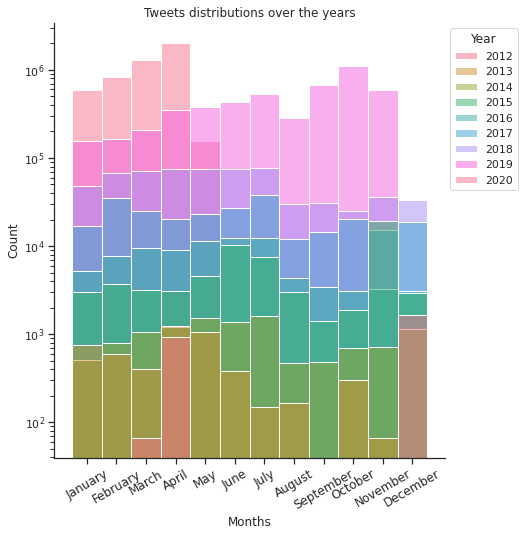

In [ ]:
import seaborn as sns

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 8))
sns.despine(f)

# Create the histogram setting the column to be represented and the one to overlap
g = sns.histplot(
    tweets_df,
    x=tweets_df['created_at'].dt.month, hue=tweets_df['created_at'].dt.year,
    multiple='layer',
    log_scale=[False, True],
    discrete=True,
    palette='husl'
).set(title="Tweets distributions over the years")

# Tweak the visual presentation
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xlabel('Months')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='Year')
ax.set_xticklabels([month for month in calendar.month_name[1:]],
                    fontdict={'horizontalalignment': 'center', 'fontsize': 12, 'rotation': 30})
plt.show()

del g, ax

del mask_datesOK

As we can see the distribution isn't changed in a linear way, but respected some sort of ID distribution.

## Filling missing values on tweets and users dataframe

**num_hashtags**

In [ ]:
# use regex to find number of hashtags on a text and fill nan values

import re


regex_hashtag = "#[a-zA-Z0-9_]+" # or '#\w+'

m = tweets_df['num_hashtags'].isna()

tweets_df.loc[m, 'num_hashtags'] = tweets_df.loc[m, 'text'].str.count(regex_hashtag)

In [ ]:
tweets_df['num_hashtags'].isnull().values.any()

False

**num_urls**


In [ ]:
regex_url = "(https?:\/\/)?(www[.])?(t)\.co\/([a-zA-Z0-9_-]*)\/?"

m = tweets_df['num_urls'].isna()

tweets_df.loc[m, 'num_urls'] = tweets_df.loc[m, 'text'].str.count(regex_hashtag)

In [ ]:
tweets_df['num_urls'].isnull().values.any()

False

**retweet, reply count, favorite count, num mentions.**

In [ ]:
# To avoid removing important records from the dataset 
# we decide, after removing the outliers, to compute the mean per user of these counters
# and replace NaN values with the the mean per user

columns = ["retweet_count", "reply_count", "favorite_count", "num_mentions"] 

for col in columns:
  tweets_df[col].fillna(tweets_df.groupby('user_id')[col].transform('mean'), inplace=True)

**tweets_id**

In [ ]:
# we decided to replace the values for the ids in the tweets dataset by creating new unique ids
tweets_df["id"] = tweets_df["id"].fillna(method="ffill")

**statuses_count**

In [ ]:
# On data undestanding notebook we saw that only non bot have nan values on statuses count feature 
# so we compute the mean only for non bot and we substitute it for the nan values
average = users_df.loc[users_df['bot']==0]['statuses_count'].mean()

users_df['statuses_count' ].fillna(value=average, inplace=True)

**name**

In [ ]:
# there is one NaN values in name feature on user dataframe that wwe substitute with the string "UNKNOWN"
users_df['name'].fillna(value="UNKNOWN", inplace=True)

## Final Check

In [ ]:
# check if we still have nan

for col in tweets_df:
  print(f"{col} have NaN: {tweets_df[col].isna().values.any()} : {tweets_df[col].isna().sum()}")

print()


for col in users_df:
  print(f"{col} have NaN: {users_df[col].isna().values.any()} : {users_df[col].isna().sum()}")  

id have NaN: False : 0
user_id have NaN: False : 0
retweet_count have NaN: False : 0
reply_count have NaN: False : 0
favorite_count have NaN: False : 0
num_hashtags have NaN: False : 0
num_urls have NaN: False : 0
num_mentions have NaN: False : 0
created_at have NaN: False : 0
text have NaN: False : 0

user_id have NaN: False : 0
name have NaN: False : 0
lang have NaN: False : 0
bot have NaN: False : 0
subscription_date have NaN: False : 0
statuses_count have NaN: False : 0


In [ ]:
#after eliminating all the NaN we can assign correct type to the columns

columns = ["id", "user_id", "retweet_count", "reply_count", "favorite_count", "num_hashtags",  "num_urls", "num_mentions"] 
for col in columns:
  tweets_df[col] = tweets_df[col].astype(int)


In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10860709 entries, 0 to 13229861
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              int64         
 1   user_id         int64         
 2   retweet_count   int64         
 3   reply_count     int64         
 4   favorite_count  int64         
 5   num_hashtags    int64         
 6   num_urls        int64         
 7   num_mentions    int64         
 8   created_at      datetime64[ns]
 9   text            string        
dtypes: datetime64[ns](1), int64(8), string(1)
memory usage: 1.1 GB


In [ ]:
tweets_df.describe()

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
count,1.086071e+07,1.086071e+07,1.086071e+07,1.086071e+07,1.086071e+07,1.086071e+07,1.086071e+07,1.086071e+07
mean,4.755511e+17,8.303962e+08,4.932719e+02,5.757258e-02,1.283392e+00,1.872202e-01,1.640235e-01,5.120221e-01
std,1.614480e+17,8.522354e+08,6.613825e+03,1.378363e+01,7.120728e+01,3.084772e+00,3.860425e-01,8.051843e-01
min,3.460000e+02,6.780330e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.646533e+17,2.325471e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.250046e+17,4.680735e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.774314e+17,1.226238e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,9.999974e+17,3.164942e+09,3.932630e+05,7.900000e+03,2.266100e+04,2.481000e+03,2.800000e+01,1.100000e+01


In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11508 non-null  int64         
 1   name               11508 non-null  string        
 2   lang               11508 non-null  object        
 3   bot                11508 non-null  int64         
 4   subscription_date  11508 non-null  datetime64[ns]
 5   statuses_count     11508 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1), string(1)
memory usage: 629.3+ KB


In [ ]:
users_df.describe()

,user_id,bot,statuses_count
count,1.150800e+04,11508.000000,11508.000000
mean,1.274517e+09,0.531456,6082.843798
std,9.354135e+08,0.499031,18768.971290
min,6.780330e+05,0.000000,0.000000
25%,4.663594e+08,0.000000,42.000000
50%,1.128643e+09,1.000000,71.000000
75%,2.357148e+09,1.000000,4318.000000
max,3.164942e+09,1.000000,399555.000000


# Indicators


#### Indicator 1 : How many tweets were published by the user?

In [ ]:
uniques_id = users_df['user_id'].unique()
grouped = tweets_df.groupby('user_id')

number_of_tweets = grouped['favorite_count'].count()
for user_id in number_of_tweets.index:
    users_df.loc[users_df['user_id'] == user_id, 'number_of_tweets'] = number_of_tweets[user_id]

users_df['number_of_tweets'] = users_df['number_of_tweets']

In [ ]:
len(tweets_df['user_id'].unique())

11508

In [ ]:
users_df['number_of_tweets'].astype('Int64')


0         127
1         119
2           4
3        1394
4        3535
         ... 
11503    1075
11504    2022
11505       7
11506     101
11507    3548
Name: number_of_tweets, Length: 11508, dtype: Int64

In [ ]:

for col in users_df.columns:
  print(f"{col} have NaN: {users_df[col].isna().values.any()} : {users_df[col].isna().sum()}")  

user_id have NaN: False : 0
name have NaN: False : 0
lang have NaN: False : 0
bot have NaN: False : 0
subscription_date have NaN: False : 0
statuses_count have NaN: False : 0
number_of_tweets have NaN: False : 0


#### Indicator 2 : How many tweets are published by the user in a given period of time

In [ ]:
grouped = tweets_df.groupby('user_id')
result = grouped.apply(lambda x: x['created_at'].dt.year.value_counts().sort_index().to_dict())
for user_id in result.index:
    tweets_2019 = result[user_id].get(2019, 0)
    tweets_2020 = result[user_id].get(2020, 0)
    users_df.loc[users_df['user_id'] == user_id, 'tweets_2019'] = tweets_2019
    users_df.loc[users_df['user_id'] == user_id, 'tweets_2020'] = tweets_2020

users_df['tweets_2019'] = users_df['tweets_2019'].astype(int)
users_df['tweets_2020'] = users_df['tweets_2020'].astype(int)

In [ ]:
print(users_df['tweets_2019'], users_df['tweets_2020'])

0         127
1         119
2           0
3        1393
4           0
         ... 
11503       0
11504     960
11505       0
11506     101
11507       0
Name: tweets_2019, Length: 11508, dtype: int64 0           0
1           0
2           0
3           0
4        3535
         ... 
11503    1075
11504     477
11505       0
11506       0
11507    3548
Name: tweets_2020, Length: 11508, dtype: int64


#### Indicator 3: favorite_count
Indicators on favorite_count
1.   Total number of *likes* received by the user
2.   Max number of *likes* received by the user
3.   Mean number of *likes* received by the user per tweet



In [ ]:
grouped = tweets_df.groupby('user_id')

likes_sum = grouped['favorite_count'].sum()
likes_max = grouped['favorite_count'].max()
likes_mean = grouped['favorite_count'].mean()

for user_id in likes_sum.index:
    likes_sum_for_this_user = likes_sum[user_id]
    likes_mean_for_this_user = likes_mean[user_id]
    likes_max_for_this_user = likes_max[user_id]

    users_df.loc[users_df['user_id'] == user_id, 'likes_sum'] = likes_sum_for_this_user
    users_df.loc[users_df['user_id'] == user_id, 'likes_mean'] = likes_mean_for_this_user
    users_df.loc[users_df['user_id'] == user_id, 'likes_max'] = likes_max_for_this_user


users_df['likes_sum'] = users_df['likes_sum'].astype(int)
users_df['likes_max'] = users_df['likes_max'].astype(int)

#### Indicator 4: Ratio between the number of tweets and the number of likes

In [ ]:
grouped = tweets_df.groupby('user_id')

likes_sum = grouped['favorite_count'].sum()
number_of_tweets = grouped['favorite_count'].count()

for user_id in likes_sum.index:
    likes_sum_for_this_user = likes_sum[user_id]
    number_of_tweets_for_this_user = number_of_tweets[user_id]

    ratio_num_likes_and_num_tweets = likes_sum_for_this_user/number_of_tweets_for_this_user

    users_df.loc[users_df['user_id'] == user_id, 'ratio_num_likes_and_num_tweets'] = ratio_num_likes_and_num_tweets

#### Indicator 5 : Time delta in sec

This indicator provides the average time passed between the publishing of two consecutive tweets by the same user expressed in seconds

In [ ]:
uniques_id = users_df['user_id'].unique()
grouped = tweets_df.groupby('user_id')

for user_id in uniques_id:
  dates = grouped.get_group(user_id)["created_at"].sort_values()
  if(len(dates)<2):
    users_df.loc[users_df['user_id'] == user_id, "time_delta_sec"] = 0
    continue

  mean_delta = 0

  for first_date, second_date in zip(dates, dates[1:]):
    diff = (second_date-first_date).total_seconds()
    mean_delta += diff
    time_delta_sec = mean_delta/(len(dates)-1)
  
  users_df.loc[users_df['user_id'] == user_id, "time_delta_sec"] = time_delta_sec

#### Indicator 6: Entropy of the user

In [ ]:
from scipy.stats import entropy
from math import log, e

def calculate_entropy(column):
    vc = pd.Series(column).value_counts(normalize=True, sort=False)
    return -(vc * np.log(vc)/np.log(e)).sum()

In [ ]:
from scipy.stats import entropy

def calculate_entropy_for_this_feature(feature): #must be a tweets_df feature
  if feature not in tweets_df.columns:
    raise BaseException("feature must be a column of tweets_df: ["+(tweets_df.columns)+"]")

  uniques_id = users_df['user_id'].unique()
  grouped = tweets_df.groupby('user_id')

  for user_id in uniques_id:
      likes_for_this_user = grouped.get_group(user_id)[feature]
      entropy = calculate_entropy(likes_for_this_user)
      label = feature+"_entropy"
      users_df.loc[users_df['user_id'] == user_id, label] = entropy

In [ ]:
calculate_entropy_for_this_feature("favorite_count")

In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10860709 entries, 0 to 13229861
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              int64         
 1   user_id         int64         
 2   retweet_count   int64         
 3   reply_count     int64         
 4   favorite_count  int64         
 5   num_hashtags    int64         
 6   num_urls        int64         
 7   num_mentions    int64         
 8   created_at      datetime64[ns]
 9   text            string        
dtypes: datetime64[ns](1), int64(8), string(1)
memory usage: 1.1 GB


In [ ]:
calculate_entropy_for_this_feature("num_hashtags")

In [ ]:
calculate_entropy_for_this_feature("created_at")

#### Indicator 7: Average  and max length of the tweets per user

In [ ]:
grouped = tweets_df.groupby('user_id')
mean_len = grouped['text'].apply(lambda x: x.str.len().mean())
max_len = grouped['text'].apply(lambda x: x.str.len().max())

for user_id in mean_len.index:
    value_mean = mean_len[user_id]
    value_max = max_len[user_id]
    users_df.loc[users_df['user_id'] == user_id, 'mean_length'] = value_mean
    users_df.loc[users_df['user_id'] == user_id, 'mean_length'] = value_max

#### Indicator 8: Average number of special characters in the tweets per user

In [ ]:
set_of_special_characters = [".",";",":","!","?","-",",","_","/",
                             "(",")","[","]","{","}","|","\\","$",
                             "%","^","&","*","~","`","'","\"",
                             "<",">","=","+","-","—","–","…",
                             "’","‘","“","”","—", "Ã","©","®","™","â","€","™","¢","£",
                             "¨","§","¶","•","ª","º","¹","²","³","¼","½","¾","¿","×","÷",
                             "Ø","ø","Æ","æ","ß","Þ","þ","Ð","ð","Ý","ý","ÿ","Ù","ù","Ú",
                             "¡","¤","¦","¥","¦","¬","¯","±","µ","¶","·","¸","¹","º","»","¼","½","¾","¿","×","÷",
                             "Û","û","Ý","ý","ÿ","Ÿ","Œ","œ","Š","š","Ÿ","Ž","ž","ƒ",
                             "Ç","ç","Ê","ê","Ë","ë","Ì","ì","Í","í","Î",
                             "î","Ï","ï","Ñ","ñ","Ô","ô","Õ","õ","Û","û","Ü","ü"]

uniques_id = users_df['user_id'].unique()
grouped = tweets_df.groupby('user_id')
combine = lambda x: ''.join(filter(None, x))
count_special_characters = lambda x: sum(map(x.count, set_of_special_characters))
combined = grouped['text'].apply(combine)
number_special_chars_per_users = combined.apply(count_special_characters)

In [ ]:
for user_id in number_special_chars_per_users.index:
    number_special_chars_for_this_user = number_special_chars_per_users[user_id]
    len_all_tweets_for_this_user = len(combined[user_id])
    users_df.loc[users_df['user_id'] == user_id, 'number_of_special_chars'] = number_special_chars_for_this_user
    users_df.loc[users_df['user_id'] == user_id, 'len_all_tweets'] = len_all_tweets_for_this_user
    users_df.loc[users_df['user_id'] == user_id, 'mean_special_char'] = number_special_chars_for_this_user/len_all_tweets_for_this_user

users_df['number_of_special_chars'] = users_df['number_of_special_chars'].astype(int)
users_df['len_all_tweets'] = users_df['len_all_tweets'].astype(int)

#### Custom Indicator 9 : Mean, Max for num_hashtag

In [ ]:
grouped = tweets_df.groupby('user_id')

num_hashtags_mean = grouped['num_hashtags'].mean()
num_hashtags_max = grouped['num_hashtags'].max()

for user_id in num_hashtags_mean.index:
    num_hashtags_mean_for_this_user = num_hashtags_mean[user_id]
    num_hashtags_max_for_this_user = num_hashtags_max[user_id]

    users_df.loc[users_df['user_id'] == user_id, 'num_hashtags_mean'] = num_hashtags_mean_for_this_user
    users_df.loc[users_df['user_id'] == user_id, 'num_hashtags_max'] = num_hashtags_max_for_this_user

#### Custom Indicator 10 : Mean, Max for num_urls

In [ ]:
grouped = tweets_df.groupby('user_id')

num_urls_mean = grouped['num_urls'].mean()
num_urls_max = grouped['num_urls'].max()

for user_id in num_urls_mean.index:
    num_urls_mean_for_this_user = num_urls_mean[user_id]
    num_urls_max_for_this_user = num_urls_max[user_id]

    users_df.loc[users_df['user_id'] == user_id, 'num_urls_mean'] = num_urls_mean_for_this_user
    users_df.loc[users_df['user_id'] == user_id, 'num_urls_max'] = num_urls_max_for_this_user

#### Custom Indicator 11 : Mean, Max for num_mentions

In [ ]:
grouped = tweets_df.groupby('user_id')

num_mentions_mean = grouped['num_mentions'].mean()
num_mentions_max = grouped['num_mentions'].max()

for user_id in num_mentions_mean.index:
    num_mentions_mean_for_this_user = num_mentions_mean[user_id]
    num_mentions_max_for_this_user = num_mentions_max[user_id]

    users_df.loc[users_df['user_id'] == user_id, 'num_mentions_mean'] = num_mentions_mean_for_this_user
    users_df.loc[users_df['user_id'] == user_id, 'num_mentions_max'] = num_mentions_max_for_this_user

#### Custom Indicator 12 : Number of retweets


In [ ]:
tweets_df['is_retweet'] = tweets_df['text'].str.contains('^RT @[\w_]+:', regex=True)
print(tweets_df['is_retweet'].value_counts())

False    8862276
True     1998433
Name: is_retweet, dtype: Int64


In [ ]:
grouped = tweets_df.groupby('user_id')

for i,(val, user_number_of_retweets) in enumerate(grouped['is_retweet'].value_counts().iteritems()):
  user_id = val[0]
  user_is_a_retweet = val[1]

  if user_is_a_retweet:
    users_df.loc[users_df['user_id'] == user_id, 'user_number_of_retweets'] = user_number_of_retweets

users_df['user_number_of_retweets'] = users_df['user_number_of_retweets'].fillna(0)
users_df['user_number_of_retweets'] = users_df['user_number_of_retweets'].astype(int)

## Conclusion: recap of indicators 

In [ ]:
users_df.columns

Index(['user_id', 'name', 'lang', 'bot', 'subscription_date', 'statuses_count',
       'number_of_tweets', 'tweets_2019', 'tweets_2020', 'likes_sum',
       'likes_mean', 'likes_max', 'ratio_num_likes_and_num_tweets',
       'time_delta_sec', 'favorite_count_entropy', 'num_hashtags_entropy',
       'created_at_entropy', 'mean_length', 'number_of_special_chars',
       'len_all_tweets', 'mean_special_char', 'num_hashtags_mean',
       'num_hashtags_max', 'num_urls_mean', 'num_urls_max',
       'num_mentions_mean', 'num_mentions_max', 'user_number_of_retweets'],
      dtype='object')

In [ ]:
users_df.head()

,user_id,name,lang,bot,subscription_date,statuses_count,number_of_tweets,tweets_2019,tweets_2020,likes_sum,...,number_of_special_chars,len_all_tweets,mean_special_char,num_hashtags_mean,num_hashtags_max,num_urls_mean,num_urls_max,num_mentions_mean,num_mentions_max,user_number_of_retweets
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0,127.0,127,0,5,...,479,8202,0.058400,0.102362,3.0,0.000000,0.0,0.283465,1.0,0
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0,119.0,119,0,6,...,392,8367,0.046851,0.033613,1.0,0.000000,0.0,0.344538,1.0,0
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0,4.0,0,0,0,...,19,77,0.246753,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
3,466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0,1394.0,1393,0,254,...,6589,123587,0.053315,0.083214,9.0,0.026542,2.0,0.006456,3.0,6
4,2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0,3535.0,0,3535,218,...,10785,263532,0.040925,0.135219,4.0,0.004809,2.0,0.522772,6.0,0


In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 0 to 11507
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   user_id                         11508 non-null  int64         
 1   name                            11508 non-null  string        
 2   lang                            11508 non-null  object        
 3   bot                             11508 non-null  int64         
 4   subscription_date               11508 non-null  datetime64[ns]
 5   statuses_count                  11508 non-null  float64       
 6   number_of_tweets                11508 non-null  float64       
 7   tweets_2019                     11508 non-null  int64         
 8   tweets_2020                     11508 non-null  int64         
 9   likes_sum                       11508 non-null  int64         
 10  likes_mean                      11508 non-null  float64       
 11  li

In [ ]:
for col in users_df:
  print(f"{col} have NaN: {users_df[col].isna().values.any()} : {users_df[col].isna().sum()}")

user_id have NaN: False : 0
name have NaN: False : 0
lang have NaN: False : 0
bot have NaN: False : 0
subscription_date have NaN: False : 0
statuses_count have NaN: False : 0
number_of_tweets have NaN: False : 0
tweets_2019 have NaN: False : 0
tweets_2020 have NaN: False : 0
likes_sum have NaN: False : 0
likes_mean have NaN: False : 0
likes_max have NaN: False : 0
ratio_num_likes_and_num_tweets have NaN: False : 0
time_delta_sec have NaN: False : 0
favorite_count_entropy have NaN: False : 0
num_hashtags_entropy have NaN: False : 0
created_at_entropy have NaN: False : 0
mean_length have NaN: False : 0
number_of_special_chars have NaN: False : 0
len_all_tweets have NaN: False : 0
mean_special_char have NaN: False : 0
num_hashtags_mean have NaN: False : 0
num_hashtags_max have NaN: False : 0
num_urls_mean have NaN: False : 0
num_urls_max have NaN: False : 0
num_mentions_mean have NaN: False : 0
num_mentions_max have NaN: False : 0
user_number_of_retweets have NaN: False : 0


#Correlation

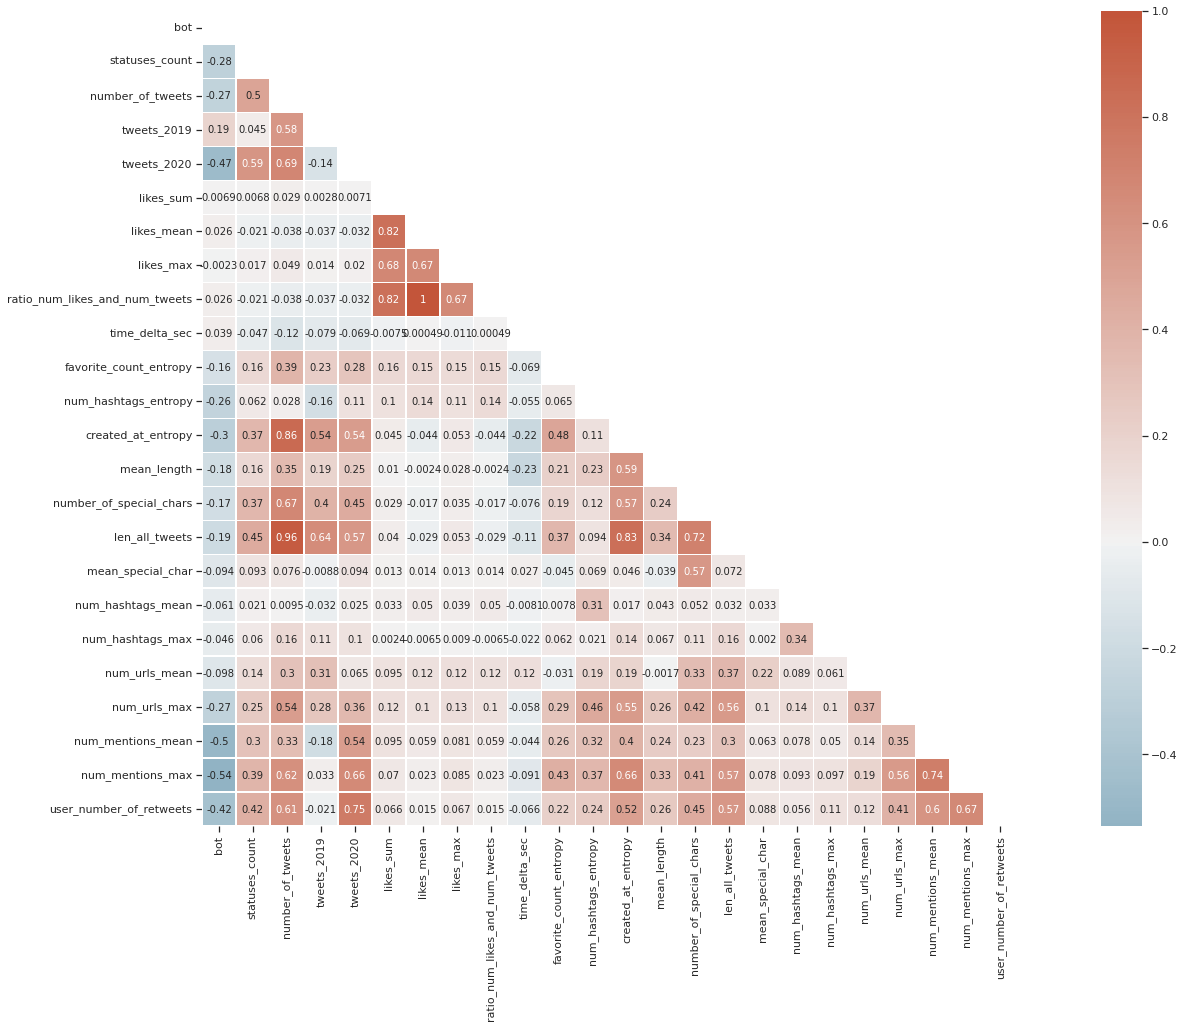

In [ ]:
corr = users_df.drop(columns=['user_id', 'user_id']).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30, 15))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, annot_kws={"size": 10},
            cmap=cmap, center=0,
            square=True, linewidths=.5)
plt.show()

# Saving the merged dataframe in order to be used in future tasks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/Datasets/Data Mining/users_new.csv"
users_df.to_csv(path)
path = "/content/drive/My Drive/Datasets/Data Mining/tweets_new.csv"
tweets_df.to_csv(path)